In [1]:
import numpy as np

data = np.load('/data/Anaiis/Data/Data/SEED/len_200/smooth_False/7_20131030/de.npy')
# data = np.load('../Effect_Att/Data/len_96/False/s13/data.npy')
# label = np.load('../Effect_Att/Data/len_96/False/s13/label.npy')

print(data.shape)

(3394, 62, 5)


In [5]:
import os
import numpy as np

# 定义数据集的路径
base_path = "../Effect_Att/Data/len_96/False"

# 初始化空列表，用于存储数据和标签
data_list = []
label_list = []

# 遍历文件夹
for i in range(1, 33):  # 从 01 到 32
    folder_name = f"s{i:02d}"  # 格式化为两位数字，前面补零
    folder_path = os.path.join(base_path, folder_name)
    
    data_file = os.path.join(folder_path, "data.npy")
    label_file = os.path.join(folder_path, "label.npy")
    
    # 检查文件是否存在
    if os.path.exists(data_file) and os.path.exists(label_file):
        data = np.load(data_file)
        label = np.load(label_file)
        
        data_list.append(data)
        label_list.append(label)
    else:
        print(f"文件 {data_file} 或 {label_file} 不存在")

# 将列表中的数据和标签沿第0维度拼接在一起
all_data = np.concatenate(data_list, axis=0)
all_labels = np.concatenate(label_list, axis=0)

# 打印拼接后的形状
print(f"All data shape: {all_data.shape}")
print(f"All labels shape: {all_labels.shape}")


All data shape: (102400, 32, 4, 96)
All labels shape: (102400,)


In [8]:
np.save("../Effect_Att/Data/len_96/False/all/label.npy", all_labels)

# 可视化第二层GAT后的数据


In [2]:
import torch
i = 0 
attn_weight = torch.load(f'./vis_data/attn_weight_{i}.pt')
edge_index = torch.load(f'./vis_data/edge_index_{i}.pt')
label = torch.load(f'./vis_data/labels_0.pt')

In [24]:
label

tensor([1], device='cuda:1')

In [25]:
label = torch.load(f'./vis_data/labels_6.pt')
label

tensor([2], device='cuda:1')

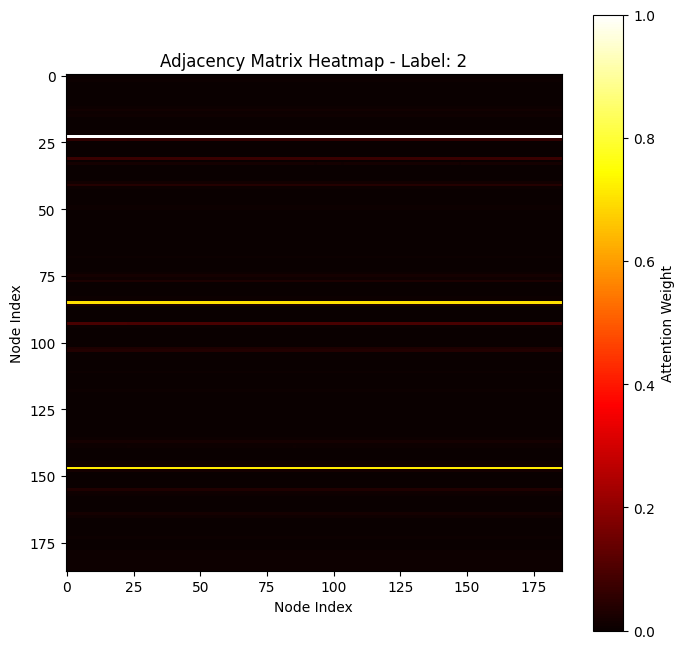

In [15]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

cnt = 0
band = "gamma"
selec_lab = 2
person = '9_20140620'
for n in range(225):
# 加载注意力权重和 edge_index
    attention_weights = torch.load(f'/data/Anaiis/garage/vis_data/{person}/attn_weight_l1{band}_{n}.pt')
    edge_index = torch.load(f'/data/Anaiis/garage/vis_data/{person}/edge_index_l1{band}_{n}.pt')
    label = torch.load(f'/data/Anaiis/garage/vis_data/{person}/labels_{n}.pt').item()
    if label == selec_lab :
        # 将 edge_index 和 attention_weights 转换为 NumPy 数组
        if cnt == 0:
            edge_index_np = edge_index.cpu().numpy()
            attention_weights_np = attention_weights.cpu().numpy().squeeze()
            cnt += 1
        else:
            attention_weights_np += attention_weights.cpu().numpy().squeeze()



num_nodes = edge_index_np.max() + 1  # 假设节点编号是从0开始的

# 创建一个空的邻接矩阵
adj_matrix = np.zeros((num_nodes, num_nodes))

# 使用 edge_index 和 attention_weights 填充邻接矩阵
for idx in range(edge_index_np.shape[1]):
    i, j = edge_index_np[:, idx]
    adj_matrix[i, j] = attention_weights_np[idx].mean()
adj_matrix_normalized = (adj_matrix - adj_matrix.min()) / (adj_matrix.max() - adj_matrix.min())

# 绘制邻接矩阵的热力图
plt.figure(figsize=(8, 8))
plt.title(f"Adjacency Matrix Heatmap - Label: {selec_lab}")
plt.imshow(adj_matrix_normalized, cmap='hot', interpolation='nearest')
plt.colorbar(label='Attention Weight')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.savefig(f'/data/Anaiis/garage/figs/seed_label{selec_lab}/{person}/avg_{band}_fig')
plt.show()
    # 计算每个边的平均注意力权重（如果有多个头部）
    # attention_weights_np = attention_weights_np.mean(axis=1)

    # # 创建一个无向图
    # G = nx.Graph()

    # # 假设节点编号从0开始连续编号
    # num_nodes = edge_index.max().item() + 1
    # G.add_nodes_from(range(num_nodes))

    # 添加边及其权重
    # for i in range(edge_index_np.shape[1]):
    #     src = edge_index_np[0, i]
    #     dst = edge_index_np[1, i]
    #     weight = attention_weights_np[i]
    #     G.add_edge(src, dst, weight=weight)

    # # 计算每个节点的总连接强度（即所有相连边的权重之和）
    # node_strength = {node: 0.0 for node in G.nodes()}
    # for (u, v, d) in G.edges(data=True):
    #     node_strength[u] += d['weight']
    #     node_strength[v] += d['weight']

    # # 固定节点位置
    # pos = nx.spring_layout(G, seed=42)  # 固定布局

    # # 将节点强度转换为颜色值（归一化到 [0, 1]）
    # node_colors = np.array(list(node_strength.values()))
    # node_colors_normalized = (node_colors - node_colors.min()) / (node_colors.max() - node_colors.min())
    # cmap = plt.cm.viridis

    # # 绘制图形
    # plt.figure(figsize=(10, 7))
    # nx.draw_networkx_nodes(G, pos, node_color=node_colors_normalized, node_size=500, cmap=cmap)
    # weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
    # nx.draw_networkx_edges(G, pos, width=1, edge_color='grey', alpha=0.5)
    # nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=node_colors.min(), vmax=node_colors.max()))
    # sm.set_array([])
    # plt.colorbar(sm, label='Node Connection Strength')

    # plt.title('EEG Graph Visualization with Attention Weights')
    # # plt.show()
    # plt.savefig(f'/data/Anaiis/garage/figs/seed_label{label}/7_20131030/theta_fig_{n}')
    


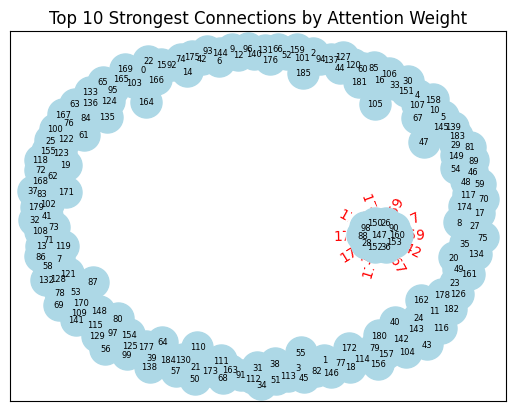

In [28]:
# 获取前10个最大权重的边索引
top_k = 10
top_indices = attention_weights_np.argsort()[-top_k:][::-1]  # 从大到小排序

top_edges = [(edge_index_np[0, i], edge_index_np[1, i]) for i in top_indices]
top_weights = [attention_weights_np[i] for i in top_indices]

# 创建一个新的图，仅包含前10条边
G_top = nx.Graph()
G_top.add_nodes_from(range(edge_index.max().item() + 1))
for (src, dst), weight in zip(top_edges, top_weights):
    G_top.add_edge(src, dst, weight=weight)

# 生成节点的布局
pos = nx.spring_layout(G_top)

# 绘制节点
nx.draw_networkx_nodes(G_top, pos, node_color='lightblue', node_size=500)

# 绘制带有颜色和宽度的边
edge_widths = [weight * 5 for weight in top_weights]
edge_colors = [plt.cm.Blues((weight - min(top_weights)) / (max(top_weights) - min(top_weights))) for weight in top_weights]
nx.draw_networkx_edges(G_top, pos, width=edge_widths, edge_color=edge_colors)

# 绘制边的权重标签
edge_labels = {(src, dst): f'{weight*10000:.4f}' for (src, dst), weight in zip(top_edges, top_weights)}
nx.draw_networkx_edge_labels(G_top, pos, edge_labels=edge_labels, font_color='red')

# 绘制节点标签
nx.draw_networkx_labels(G_top, pos, font_size=6, font_color='black')

plt.title("Top 10 Strongest Connections by Attention Weight")
plt.show()

In [32]:
len(set(attention_weights_np))

34527

In [34]:
(attention_weights.shape)

torch.Size([34596, 1])

上一part结论：attn weight拉不开差距，要不显示特征试试？头皮图

In [21]:
for i in range(20, 30):
    attn_weight = torch.load(f'./vis_data/afterconv_de_{i}.pt')
    print("true label:", torch.load(f'./vis_data/labels_{i}.pt').item())
    attn_weight[:, 0].shape
    feat0 =  attn_weight[:, 0]
    # feat0.reshape((62, 3))
    print("feat0", feat0.unique())
    print("feat1", attn_weight[:, 1].unique())
    print("feat2", attn_weight[:, 2].unique())

true label: 2
feat0 tensor([11.6312, 11.6312, 11.6312, 11.6312, 11.6312, 11.6312, 11.6312, 11.6312,
        11.6312, 11.6312, 11.6312, 11.6312, 11.6312], device='cuda:1')
feat1 tensor([2.6715, 2.6715, 2.6715, 2.6715, 2.6715, 2.6715, 2.6715, 2.6715, 2.6715],
       device='cuda:1')
feat2 tensor([48.7491, 48.7492, 48.7492, 48.7492, 48.7492, 48.7492, 48.7492, 48.7492,
        48.7492, 48.7492, 48.7492, 48.7492, 48.7492, 48.7492, 48.7492, 48.7492,
        48.7492], device='cuda:1')
true label: 1
feat0 tensor([-0.0022, -0.0022, -0.0022, -0.0022, -0.0022, -0.0022, -0.0022, -0.0022,
        -0.0022, -0.0022], device='cuda:1')
feat1 tensor([20.0898, 20.0898, 20.0898, 20.0898, 20.0898, 20.0898, 20.0898, 20.0898,
        20.0899, 20.0899], device='cuda:1')
feat2 tensor([0.2720, 0.2720, 0.2720, 0.2720, 0.2720, 0.2720, 0.2720, 0.2720],
       device='cuda:1')
true label: 2
feat0 tensor([2.4551, 2.4551, 2.4551, 2.4551, 2.4551, 2.4551, 2.4551, 2.4551, 2.4551],
       device='cuda:1')
feat1 tensor([6

两次图卷积后的特征收敛到一个数值周围，所有节点都在这个数周围（单看每张图，三个标签收敛到的数值有巨大差异，很容易分类），但是是什么时候收敛到的呢，什么导致了这个收敛呢？

gamma_feats (186, 512)
(62, 512)
[[0.19385971 0.26752585 0.4058128  ... 0.6339183  0.19737026 0.18290685]
 [0.1938597  0.26752585 0.4058128  ... 0.63063085 0.20009059 0.18582173]
 [0.1938597  0.26752585 0.4058128  ... 0.60868067 0.20995522 0.19572881]
 ...
 [0.1938597  0.26752585 0.40581283 ... 0.60992587 0.2102266  0.19609728]
 [0.1938597  0.26752585 0.40581283 ... 0.61788696 0.20791335 0.19393133]
 [0.1938597  0.26752585 0.40581283 ... 0.61465764 0.20921758 0.19522804]]
[0.53965352 0.53960317 0.53833487 0.53961742 0.53968102 0.53779507
 0.53962762 0.53918268 0.53930821 0.53925212 0.53955044 0.53952464
 0.53936711 0.53961909 0.5393308  0.53938194 0.53924079 0.53905505
 0.53914953 0.53891262 0.53924093 0.53949221 0.53954995 0.53910215
 0.53925752 0.53884522 0.53872147 0.53891227 0.53888045 0.53898017
 0.53904003 0.5393778  0.53878202 0.53873088 0.53874843 0.53860597
 0.53865619 0.53917699 0.5390632  0.53913416 0.5391532  0.53862704
 0.53870725 0.5386735  0.53856881 0.53861177 0.5385866

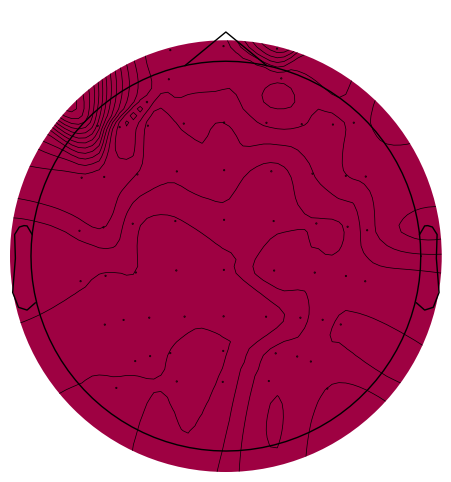

In [3]:
import mne
import torch
import numpy as np
import matplotlib.pyplot as plt


i=10
gamma_feats = torch.load(f'/data/Anaiis/garage/vis_data/7_20131030/gamma_feats_{i}.pt')
gamma_feats = gamma_feats.cpu().numpy()
print("gamma_feats", gamma_feats.shape)
gamma_feats = gamma_feats.reshape((3, 62, -1))

n_channels = 62
sfreq = 256
n_times = 1
data = gamma_feats[2, :, :].squeeze()
print(data.shape)
print(data)
# 设置通道名称（假设使用国际10-20系统的标准名称）
biosemi_montage = mne.channels.make_standard_montage('standard_1020')
# print(biosemi_montage.ch_names, biosemi_montage)
channel_names = [
    'Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8',
    'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz',
    'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7',
    'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POz', 'PO4', 'PO6', 
    'PO8', 'PO9', 'O1', 'Oz', 'O2', 'PO10'
]
info = mne.create_info(ch_names=channel_names, sfreq=128, ch_types='eeg')
evoked = mne.EvokedArray(data, info)
evoked.set_montage(biosemi_montage)
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
print(np.mean(evoked.data, axis=1))
mne.viz.plot_topomap(np.mean(evoked.data, axis=1), evoked.info, show=False, 
                    ch_type='eeg', cmap='Spectral_r', contours=15, axes=ax, vlim=(0.1, 0.5))#vlim=(vmin, vmax),
plt.show()